In [2]:
# 以下のライブラリを使うので、あらかじめ読み込んでおいてください
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 小数第３位まで表示
%precision 3

np.random.seed(0)

In [3]:
coin_data = np.array([0, 1])

In [8]:
sample_num = 1000
samples = np.random.choice(coin_data, sample_num)
for i in range(0, 2):
    p = len(samples[samples == i]) / sample_num
    print(p)

0.503
0.497


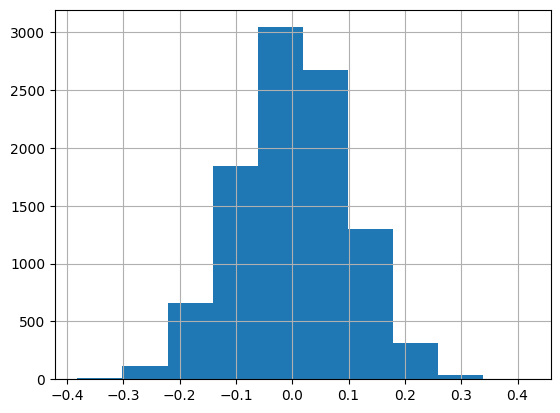

In [12]:
data = [np.random.normal(0, 1, 100).mean() for _ in range(10000)]
plt.hist(data)
plt.grid(True)

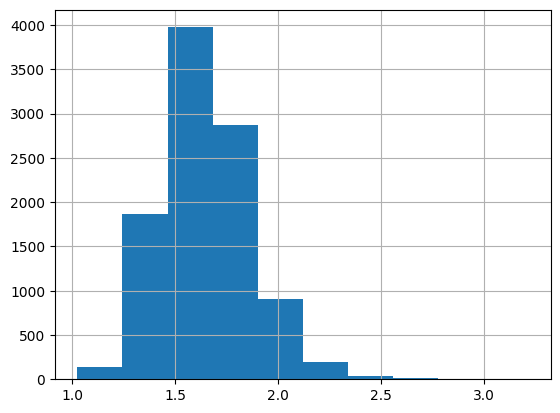

In [13]:
data = [np.random.lognormal(0, 1, 100).mean() for _ in range(10000)]
plt.hist(data)
plt.grid(True)

In [18]:
data_math = pd.read_csv("./chap3/student-mat.csv", sep=";")
data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


<AxesSubplot:ylabel='Density'>

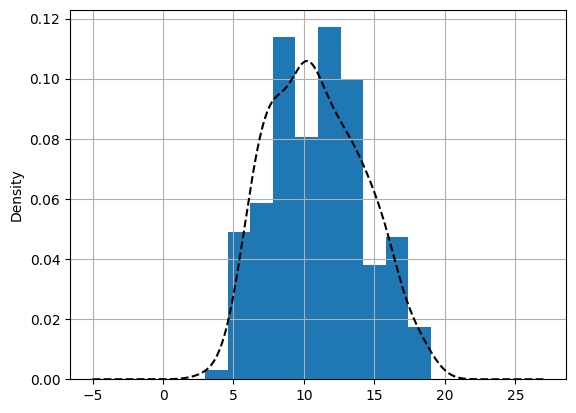

In [24]:
data_math.G1.plot(kind="kde", style="k--")
data_math.G1.hist(density=True)

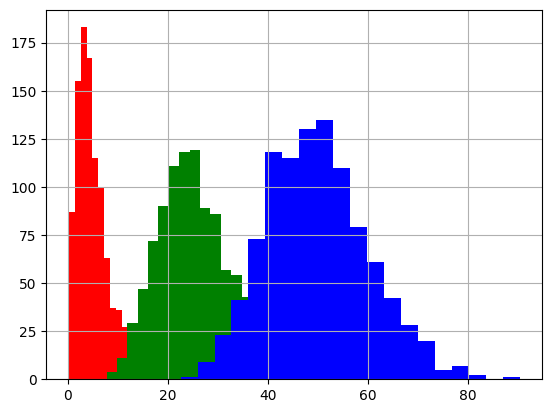

In [38]:
for df, c in zip([5, 25, 50], "rgb"):
    x = np.random.chisquare(df, 1000)
    plt.hist(x, 20, color=c)
    plt.grid(True)

(array([  4.,  21.,  45., 151., 216., 240., 185.,  94.,  35.,   9.]),
 array([-3.419, -2.765, -2.11 , -1.455, -0.8  , -0.145,  0.509,  1.164,
         1.819,  2.474,  3.129]),
 <BarContainer object of 10 artists>)

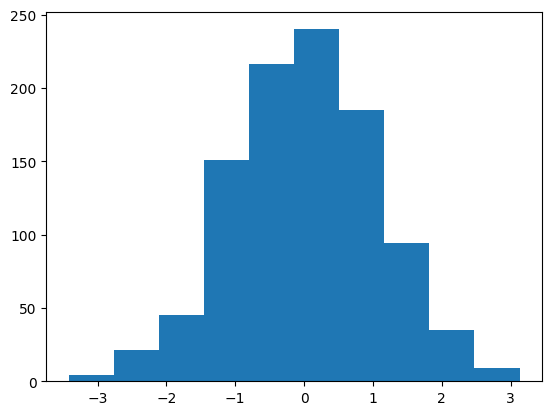

In [29]:
x = np.random.standard_t(100, 1000)
plt.hist(x)

In [36]:
student_data_math = pd.read_csv('./chap3/student-mat.csv',sep=';')
student_data_por = pd.read_csv('./chap3/student-por.csv',sep=';')
student_data_merge = pd.merge(student_data_math
                              ,student_data_por
                              ,on=['school','sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','nursery','internet']
                              ,how='inner'
                              ,suffixes=('_math', '_por'))

In [42]:
print(student_data_math.G2.mean())
print(student_data_por.G2.mean())

10.713924050632912
11.570107858243452


In [43]:
print(student_data_math.G3.mean())
print(student_data_por.G3.mean())

10.415189873417722
11.906009244992296


In [44]:
from scipy import stats

In [45]:
t, p = stats.ttest_rel(student_data_merge.G2_math, student_data_merge.G2_por)
print(p)

4.0622824801348625e-19
